<a href="https://colab.research.google.com/github/dima1115/Machine-learning/blob/main/%D0%94%D0%B0%D1%80%D0%BC%D0%BE%D1%81%D1%82%D1%83%D0%BA_%D0%BF%D1%808.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 8 — possum.csv
Простий варіант у стилі прикладу.
Дармостук Дмитро, ФІТ-4-9

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 140)

## Завантаження possum.csv

In [7]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('possum.csv')
df.head()

Saving possum.csv to possum (1).csv


,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


## EDA

In [8]:
print("Shape:", df.shape)
print(df.info())
display(df.describe())
print(df['sex'].value_counts())
print(df.isna().sum())

Shape: (104, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB
None


,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


sex
m    61
f    43
Name: count, dtype: int64
case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64


## Підготовка даних

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

target = 'sex'
X = df.drop(columns=[target])
y = df[target]

num_cols = X.select_dtypes(include='number').columns
cat_cols = X.select_dtypes(exclude='number').columns

# пайплайн для числових ознак: спочатку заповнюємо median, потім масштабуємо
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# пайплайн для категоріальних: заповнюємо найчастотнішим значенням, потім one-hot
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((83, 13), (21, 13))

## Моделі + GridSearchCV

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

models = {
    "LogReg": Pipeline([("pre", preprocessor), ("clf", LogisticRegression(max_iter=500))]),
    "kNN": Pipeline([("pre", preprocessor), ("clf", KNeighborsClassifier())]),
    "RF": Pipeline([("pre", preprocessor), ("clf", RandomForestClassifier(random_state=42))]),
}

param_grids = {
    "LogReg": {"clf__C":[0.5,1,5]},
    "kNN": {"clf__n_neighbors":[3,5,7]},
    "RF": {"clf__n_estimators":[100,200], "clf__max_depth":[None,10]},
}

best_models = {}
cv_scores = {}

for name, model in models.items():
    print("\n=== ", name, " ===")
    grid = GridSearchCV(model, param_grids[name], cv=3, scoring="f1_macro", n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    cv_scores[name] = grid.best_score_
    print("Best params:", grid.best_params_)
    print("Best CV:", grid.best_score_)

cv_scores


===  LogReg  ===
Best params: {'clf__C': 1}
Best CV: 0.5806878306878307

===  kNN  ===
Best params: {'clf__n_neighbors': 3}
Best CV: 0.6260163850486431

===  RF  ===
Best params: {'clf__max_depth': None, 'clf__n_estimators': 100}
Best CV: 0.5906507584139163


{'LogReg': np.float64(0.5806878306878307),
 'kNN': np.float64(0.6260163850486431),
 'RF': np.float64(0.5906507584139163)}

## Оцінка на тесті


==== Test: LogReg ====
              precision    recall  f1-score   support

           f       0.60      0.67      0.63         9
           m       0.73      0.67      0.70        12

    accuracy                           0.67        21
   macro avg       0.66      0.67      0.66        21
weighted avg       0.67      0.67      0.67        21



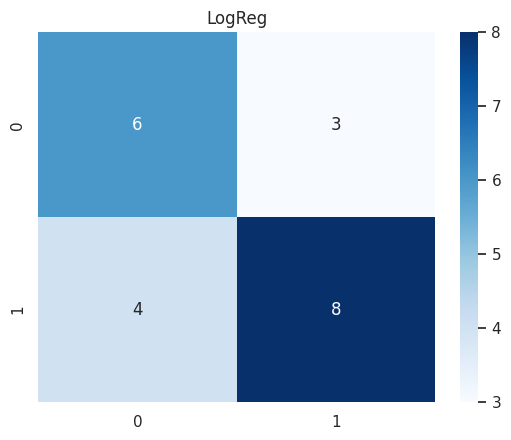


==== Test: kNN ====
              precision    recall  f1-score   support

           f       0.50      0.56      0.53         9
           m       0.64      0.58      0.61        12

    accuracy                           0.57        21
   macro avg       0.57      0.57      0.57        21
weighted avg       0.58      0.57      0.57        21



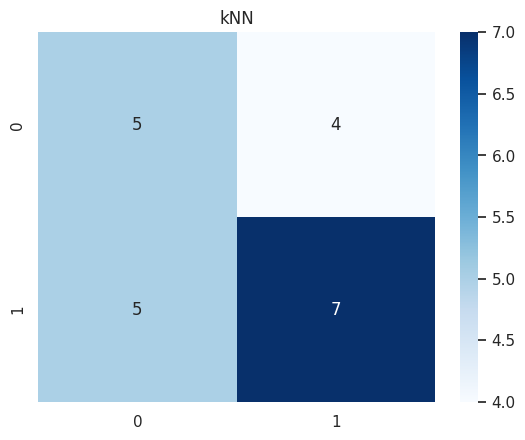


==== Test: RF ====
              precision    recall  f1-score   support

           f       0.56      0.56      0.56         9
           m       0.67      0.67      0.67        12

    accuracy                           0.62        21
   macro avg       0.61      0.61      0.61        21
weighted avg       0.62      0.62      0.62        21



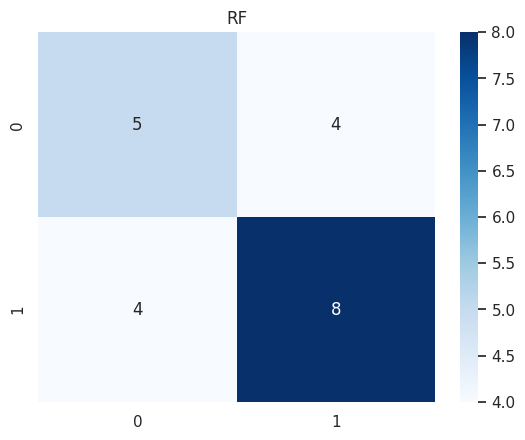

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

for name, model in best_models.items():
    print("\n==== Test:", name, "====")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, zero_division=0))
    cm = confusion_matrix(y_test, y_pred)
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(name)
    plt.show()

## Навчальна крива

Best model: kNN


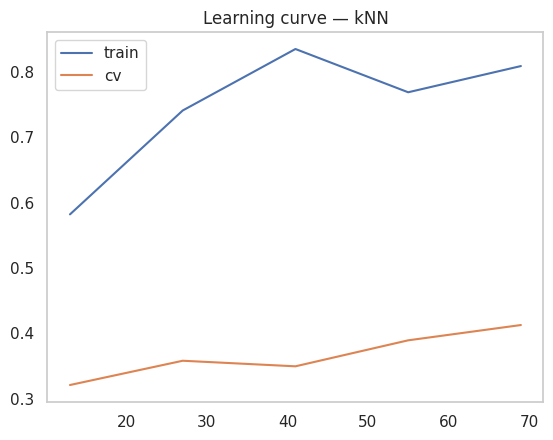

In [12]:
from sklearn.model_selection import learning_curve
import numpy as np

best_name = max(cv_scores, key=cv_scores.get)
best_model = best_models[best_name]
print("Best model:", best_name)

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=3, scoring="f1_macro", train_sizes=np.linspace(0.2,1,5), n_jobs=-1
)

plt.plot(train_sizes, train_scores.mean(axis=1), label="train")
plt.plot(train_sizes, test_scores.mean(axis=1), label="cv")
plt.legend(); plt.grid()
plt.title(f"Learning curve — {best_name}")
plt.show()